In [4]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import sklearn
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, PrecisionRecallDisplay
from sklearn.svm import SVC
from xgboost import XGBClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
import lightgbm as lgbm
from imblearn.combine import SMOTEENN

In [5]:
import warnings
warnings.filterwarnings('ignore')

# Entire Dataset
### XGBoost, LightGBM, SVM, Logistic regression

In [6]:
data = pd.read_csv('HFNC_median.csv')
data = data.drop(columns=['Unnamed: 0'])
print(data.columns)
data.head()

Index(['stay_id', 'age', 'race', 'gender', 'FiO2', 'o2_flow', 'FiO2_6hr',
       'FiO2_12hr', 'SpO2_6hr', 'SpO2_12hr', 'resp_6hr', 'resp_12hr', 'label',
       'so2_min', 'so2_max', 'po2_min', 'po2_max', 'pco2_min', 'pco2_max',
       'fio2_min', 'fio2_max', 'ph_min', 'ph_max', 'hemoglobin_min',
       'hemoglobin_max', 'temperature_min', 'temperature_max',
       'heart_rate_max', 'resp_rate_min', 'resp_rate_max', 'urineoutput',
       'ROX_6hr', 'ROX_12hr', 'height', 'weight'],
      dtype='object')


,stay_id,age,race,gender,FiO2,o2_flow,FiO2_6hr,FiO2_12hr,SpO2_6hr,SpO2_12hr,...,temperature_min,temperature_max,heart_rate_max,resp_rate_min,resp_rate_max,urineoutput,ROX_6hr,ROX_12hr,height,weight
0,39469161,20,0.0,1,55.0,5.0,55.0,55.0,97.0,93.0,...,36.67,37.67,112.0,12.0,27.0,300.0,0.097980,0.093939,191.0,120.6
1,33580370,32,0.0,0,55.0,30.0,55.0,55.0,95.0,95.0,...,36.83,37.78,144.0,20.0,34.0,350.0,0.069091,0.057576,170.0,83.8
2,38975964,26,4.0,1,60.0,4.0,60.0,60.0,92.0,94.0,...,37.06,37.56,145.0,13.0,49.0,125.0,0.032624,0.031973,150.0,83.8
3,34691729,28,0.0,0,55.0,20.0,55.0,55.0,100.0,98.0,...,36.50,37.28,119.0,16.0,67.0,110.0,0.106952,0.104813,170.0,112.6
4,36158255,29,4.0,1,60.0,10.0,60.0,60.0,98.0,96.0,...,37.33,38.39,78.0,12.0,24.0,220.0,0.081667,0.123077,173.0,66.8


In [7]:
label = data['label']
data_features = data.drop(columns = ['stay_id', 'label', 'ROX_12hr', 'ROX_6hr'])

In [8]:
data_features.columns

Index(['age', 'race', 'gender', 'FiO2', 'o2_flow', 'FiO2_6hr', 'FiO2_12hr',
       'SpO2_6hr', 'SpO2_12hr', 'resp_6hr', 'resp_12hr', 'so2_min', 'so2_max',
       'po2_min', 'po2_max', 'pco2_min', 'pco2_max', 'fio2_min', 'fio2_max',
       'ph_min', 'ph_max', 'hemoglobin_min', 'hemoglobin_max',
       'temperature_min', 'temperature_max', 'heart_rate_max', 'resp_rate_min',
       'resp_rate_max', 'urineoutput', 'height', 'weight'],
      dtype='object')

features: Index(['hemoglobin_min', 'fio2_max', 'hemoglobin_max', 'fio2_min', 'FiO2_6hr',
       'so2_min', 'so2_max', 'po2_max', 'temperature_min', 'temperature_max',
       'weight', 'heart_rate_max', 'age', 'po2_min', 'FiO2', 'SpO2_6hr',
       'SpO2_12hr', 'urineoutput', 'race', 'gender', 'o2_flow', 'FiO2_12hr',
       'ph_min', 'pco2_max', 'resp_6hr', 'resp_12hr', 'resp_rate_max',
       'resp_rate_min', 'ph_max', 'height', 'pco2_min'],
      dtype='object')
features: Index(['hemoglobin_min', 'fio2_max', 'hemoglobin_max', 'fio2_min',
       'heart_rate_max', 'so2_max', 'so2_min', 'pco2_max', 'weight',
       'SpO2_6hr', 'FiO2_6hr', 'age', 'FiO2', 'po2_min', 'gender', 'pco2_min',
       'temperature_min', 'resp_rate_max', 'race', 'o2_flow', 'urineoutput',
       'FiO2_12hr', 'ph_min', 'SpO2_12hr', 'ph_max', 'resp_12hr',
       'resp_rate_min', 'temperature_max', 'po2_max', 'height', 'resp_6hr'],
      dtype='object')
features: Index(['hemoglobin_min', 'hemoglobin_max', 'fio2_min', '

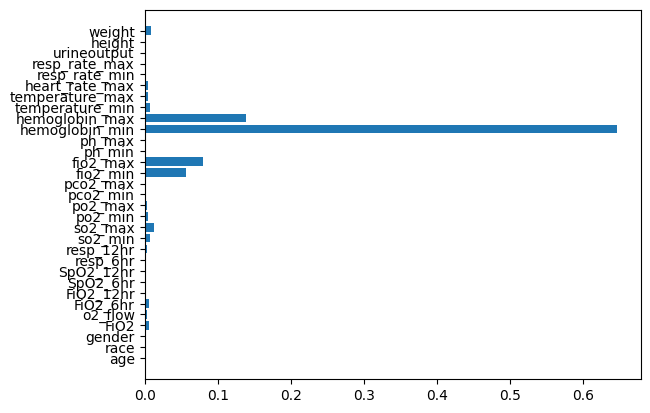

hemoglobin_min 0.6462206
hemoglobin_max 0.13830945
fio2_max 0.07926284
fio2_min 0.056592714
so2_max 0.013183907
weight 0.009191212
so2_min 0.00779443
temperature_min 0.0069393897
FiO2 0.006270989
FiO2_6hr 0.005693485
heart_rate_max 0.00477692
temperature_max 0.004301284
po2_min 0.004054436
po2_max 0.002845964
o2_flow 0.002706468
resp_12hr 0.0026804928
SpO2_12hr 0.002271664
SpO2_6hr 0.0014022337
age 0.0013020646
pco2_max 0.0012714512
pco2_min 0.0011969048
resp_6hr 0.00065850595
height 0.00040369527
FiO2_12hr 0.00025109583
gender 0.00017330846
race 0.00016514244
urineoutput 7.626222e-05
ph_min 3.111428e-06
ph_max 0.0
resp_rate_min 0.0
resp_rate_max 0.0


In [9]:
sfk = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

pred = []
truth = []
importance = []
test_index = []
for train, test in sfk.split(data_features, label):
    clf = XGBClassifier(learning_rate=0.1, colsample_bytree=0.9, n_estimators=300, max_depth=9, random_state=42)

    x_train, x_test = data_features.iloc[train], data_features.iloc[test]
    y_train, y_test = label.iloc[train], label.iloc[test]
    test_index.append(test)
    ######################## Preprocessing Pipe ########################
    ## Oversampling
    sm = SMOTEENN(random_state=42)
    X_train_scaled, y_train = sm.fit_resample(x_train, y_train)
    #######################################################################

    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(x_test)
    idx = clf.feature_importances_.argsort()[::-1]

    print('features:', data_features.columns[idx])
    if len(importance) == 0:
      importance = clf.feature_importances_
    else:
      importance = np.vstack((importance, clf.feature_importances_))
    pred.append(y_pred)
    truth.append(y_test)

pred = np.hstack(np.array(pred))
truth = np.hstack(np.array(truth))
print(classification_report(truth, pred))
print('Accuracy:',accuracy_score(truth, pred))
fpr, tpr, thresholds = roc_curve(truth, pred, pos_label=1)
print('AUC:',auc(fpr, tpr))
cm = confusion_matrix(truth, pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cmn, range(2), range(2))
print(cm)
plt.barh(data_features.columns, np.mean(importance, axis = 0))
plt.show()

idx = np.mean(importance, axis = 0).argsort()[::-1]
imp_fea = data_features.columns[idx]
imp_val = np.mean(importance, axis = 0)[idx]
for i in range(len(imp_fea)):
  print(imp_fea[i], imp_val[i])

features: Index(['age', 'hemoglobin_min', 'so2_max', 'po2_min', 'urineoutput', 'po2_max',
       'fio2_max', 'fio2_min', 'heart_rate_max', 'pco2_min', 'temperature_min',
       'resp_12hr', 'pco2_max', 'weight', 'FiO2_6hr', 'SpO2_12hr',
       'temperature_max', 'so2_min', 'ph_max', 'hemoglobin_max', 'ph_min',
       'resp_rate_max', 'SpO2_6hr', 'FiO2', 'resp_rate_min', 'resp_6hr',
       'race', 'o2_flow', 'height', 'gender', 'FiO2_12hr'],
      dtype='object')
features: Index(['hemoglobin_min', 'so2_max', 'age', 'pco2_min', 'urineoutput',
       'SpO2_12hr', 'po2_max', 'hemoglobin_max', 'ph_min', 'so2_min', 'ph_max',
       'heart_rate_max', 'fio2_max', 'pco2_max', 'FiO2', 'po2_min', 'fio2_min',
       'weight', 'resp_6hr', 'resp_12hr', 'FiO2_6hr', 'temperature_min',
       'temperature_max', 'SpO2_6hr', 'o2_flow', 'resp_rate_max',
       'resp_rate_min', 'race', 'height', 'gender', 'FiO2_12hr'],
      dtype='object')
features: Index(['so2_max', 'ph_max', 'po2_max', 'pco2_min', 'hemo

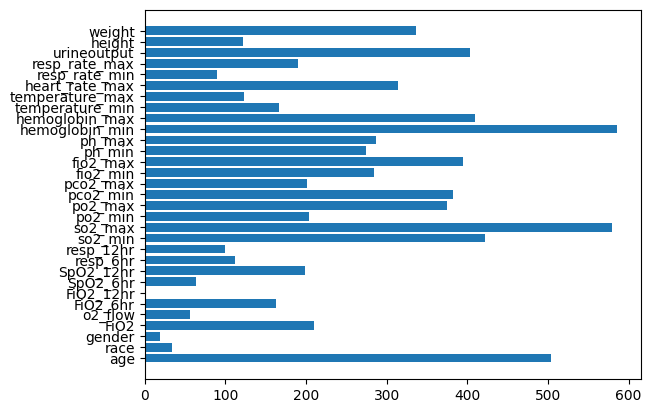

hemoglobin_min 0.07702222806786795
so2_max 0.07615414967775877
age 0.06621070630014467
so2_min 0.05547810074970406
hemoglobin_max 0.05379455478100749
urineoutput 0.05308430882546363
fio2_max 0.05184795475470208
pco2_min 0.050295935814809935
po2_max 0.04924371958437458
weight 0.04421938708404576
heart_rate_max 0.04132579245034854
ph_max 0.03777456267262922
fio2_min 0.03735367618045508
ph_min 0.03609101670393265
FiO2 0.027620676048928053
po2_min 0.026884124687623304
pco2_max 0.026542154412731816
SpO2_12hr 0.026226489543601208
resp_rate_max 0.024937524661317895
temperature_min 0.02196501381033802
FiO2_6hr 0.021359989477837692
temperature_max 0.01628304616598711
height 0.016046297514139152
resp_6hr 0.014704721820334077
resp_12hr 0.013126397474681044
resp_rate_min 0.011811127186636853
SpO2_6hr 0.008338813626200182
o2_flow 0.007365513613047481
race 0.0044456135735893715
gender 0.002446402735762199
FiO2_12hr 0.0


In [10]:
sfk = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

pred = []
truth = []
importance = []
for train, test in sfk.split(data_features, label):
    clf = LGBMClassifier(objective='binary', learning_rate=0.01, n_estimators=300, random_state=42, verbose=-1)

    x_train, x_test = data_features.iloc[train], data_features.iloc[test]
    y_train, y_test = label.iloc[train], label.iloc[test]

    ######################## Preprocessing Pipe ########################
    ## Oversampling
    sm = SMOTEENN(random_state=42)
    X_train_scaled, y_train = sm.fit_resample(x_train, y_train)
    #######################################################################

    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(x_test)
    idx = clf.feature_importances_.argsort()[::-1]

    print('features:', data_features.columns[idx])
    if len(importance) == 0:
      importance = clf.feature_importances_
    else:
      importance = np.vstack((importance, clf.feature_importances_))
    pred.append(y_pred)
    truth.append(y_test)

pred = np.hstack(np.array(pred))
truth = np.hstack(np.array(truth))
print(classification_report(truth, pred))
print('Accuracy:',accuracy_score(truth, pred))
fpr, tpr, thresholds = roc_curve(truth, pred, pos_label=1)
print('AUC:',auc(fpr, tpr))
cm = confusion_matrix(truth, pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cmn, range(2), range(2))
print(cm)
plt.barh(data_features.columns, np.mean(importance, axis = 0))
plt.show()
idx = np.mean(importance, axis = 0).argsort()[::-1]
imp_fea = data_features.columns[idx]
imp_val = (np.mean(importance, axis = 0)/np.sum(np.mean(importance, axis = 0)))[idx]
for i in range(len(imp_fea)):
  print(imp_fea[i], imp_val[i])

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      1078
         1.0       0.90      0.95      0.92       329

    accuracy                           0.96      1407
   macro avg       0.94      0.96      0.95      1407
weighted avg       0.97      0.96      0.96      1407

Accuracy: 0.9637526652452025
AUC: 0.9605060592902539
[[1042   36]
 [  15  314]]


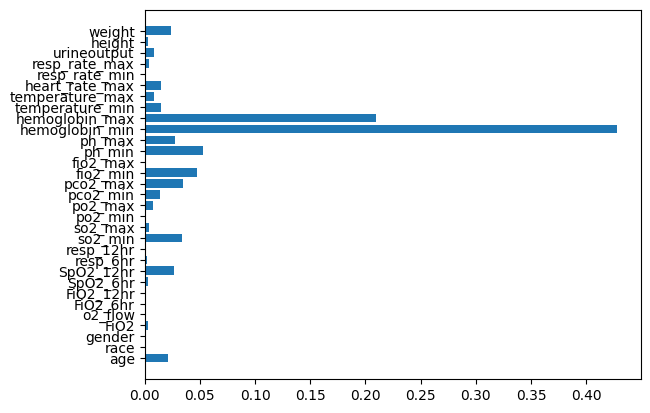

hemoglobin_min 0.4277775458217603
hemoglobin_max 0.209498240936675
ph_min 0.052520557446511615
fio2_min 0.04788401064123569
pco2_max 0.03451220977984752
so2_min 0.03406826047151856
ph_max 0.02715166677433001
SpO2_12hr 0.0269798927966381
weight 0.02352713278038769
age 0.021044415308876054
heart_rate_max 0.01526631616606165
temperature_min 0.014971991014339145
pco2_min 0.01408830988167639
temperature_max 0.008752893528528888
urineoutput 0.008281424566681276
po2_max 0.007988041679994876
resp_rate_max 0.004395921815919497
so2_max 0.003969166670481745
height 0.002813184391714186
SpO2_6hr 0.002641924702988023
FiO2 0.0026358095418106916
resp_6hr 0.002602300872246023
resp_12hr 0.0016936072124245454
o2_flow 0.001493755998029268
resp_rate_min 0.0010535388900545061
po2_min 0.0008384602854456434
race 0.0007852712114556204
gender 0.0005101461323901404
FiO2_12hr 0.00011747849119301304
FiO2_6hr 0.00011747849119301304
fio2_max 1.9045697591270388e-05


In [11]:
sfk = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

pred = []
truth = []
importance = []
for train, test in sfk.split(data_features, label):
    clf = SVC(kernel='linear',random_state=42, verbose=0)

    x_train, x_test = data_features.iloc[train], data_features.iloc[test]
    y_train, y_test = label.iloc[train], label.iloc[test]

    ######################## Preprocessing Pipe ########################
    ## Oversampling
    scaler = sklearn.preprocessing.StandardScaler()
    X_train_scaled = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    sm = SMOTEENN(random_state=42)
    X_train_scaled, y_train = sm.fit_resample(X_train_scaled, y_train)
    #######################################################################

    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(x_test)
    # idx = clf.feature_importances_.argsort()[::-1]

    # print('features:', data_features.columns[idx])
    if len(importance) == 0:
      importance = clf.coef_
    else:
      importance = np.vstack((importance, clf.coef_))
    pred.append(y_pred)
    truth.append(y_test)

pred = np.hstack(np.array(pred))
truth = np.hstack(np.array(truth))
print(classification_report(truth, pred))
print('Accuracy:',accuracy_score(truth, pred))
fpr, tpr, thresholds = roc_curve(truth, pred, pos_label=1)
print('AUC:',auc(fpr, tpr))
cm = confusion_matrix(truth, pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cmn, range(2), range(2))
print(cm)
plt.barh(data_features.columns, np.abs(np.mean(importance, axis = 0))/np.sum(np.abs(np.mean(importance, axis = 0))))
plt.show()
idx = np.abs(np.mean(importance, axis = 0)).argsort()[::-1]
imp_fea = data_features.columns[idx]
imp_val = (np.abs(np.mean(importance, axis = 0))/np.sum(np.abs(np.mean(importance, axis = 0))))[idx]
for i in range(len(imp_fea)):
  print(imp_fea[i], imp_val[i])

              precision    recall  f1-score   support

         0.0       0.97      0.85      0.91      1078
         1.0       0.65      0.92      0.76       329

    accuracy                           0.87      1407
   macro avg       0.81      0.88      0.83      1407
weighted avg       0.90      0.87      0.87      1407

Accuracy: 0.8656716417910447
AUC: 0.8848833537283386
[[915 163]
 [ 26 303]]


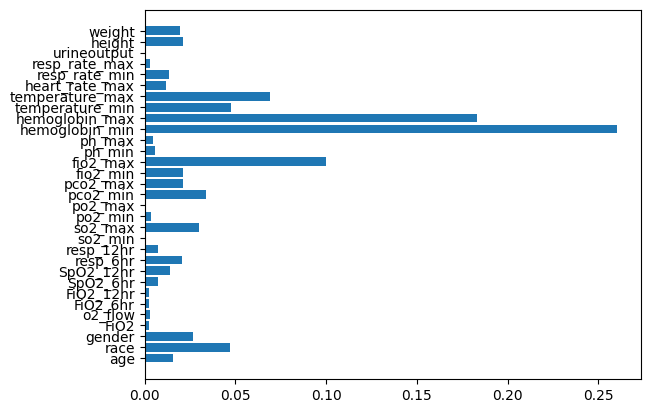

features: Index(['fio2_max', 'race', 'height', 'pco2_max', 'fio2_min', 'resp_6hr', 'age',
       'heart_rate_max', 'resp_12hr', 'SpO2_6hr', 'resp_rate_max', 'FiO2_12hr',
       'FiO2_6hr', 'urineoutput', 'so2_min', 'po2_max', 'FiO2', 'o2_flow',
       'po2_min', 'ph_max', 'ph_min', 'resp_rate_min', 'SpO2_12hr', 'weight',
       'gender', 'so2_max', 'pco2_min', 'temperature_min', 'temperature_max',
       'hemoglobin_max', 'hemoglobin_min'],
      dtype='object')
age 0.015599008865859541
race 0.0468009663947494
gender 0.02663695503096921
FiO2 0.002518339117366384
o2_flow 0.0031768252720108677
FiO2_6hr 0.002661946668503937
FiO2_12hr 0.002661946668503937
SpO2_6hr 0.0071264678969441015
SpO2_12hr 0.014062005652956882
resp_6hr 0.02068044772698806
resp_12hr 0.007350023122389775
so2_min 0.0005819782773324421
so2_max 0.029911644810319715
po2_min 0.0037410960877835154
po2_max 0.0005939362777493346
pco2_min 0.03365064350740899
pco2_max 0.02120667973490441
fio2_min 0.020972937743352165
fio2_max 0.

In [12]:
sfk = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

pred = []
truth = []
importance = []
test_index = []
for train, test in sfk.split(data_features, label):
    clf = LogisticRegression()
    x_train, x_test = data_features.iloc[train], data_features.iloc[test]
    y_train, y_test = label.iloc[train], label.iloc[test]
    test_index.append(test)

    ######################## Preprocessing Pipe ########################
    ## Oversampling
    sm = SMOTEENN(random_state=42)
    X_train_scaled, y_train = sm.fit_resample(x_train, y_train)
    # X_train_scaled = x_train
    #######################################################################

    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(x_test)
    idx = clf.coef_.argsort()[::-1]

    # print('features:', data_features.columns[idx])
    if len(importance) == 0:
      importance = clf.coef_
    else:
      importance = np.vstack((importance, clf.coef_))

    pred.append(y_pred)
    truth.append(y_test)

pred = np.hstack(pred)
truth = np.hstack(truth)
print(classification_report(truth, pred))
print('Accuracy:', accuracy_score(truth, pred))
fpr, tpr, thresholds = roc_curve(truth, pred, pos_label=1)
print('AUC:', auc(fpr, tpr))
cm = confusion_matrix(truth, pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cmn, range(2), range(2))
print(cm)
plt.barh(data_features.columns, np.abs(np.mean(importance, axis = 0))/np.sum(np.abs(np.mean(importance, axis = 0))))
plt.show()
idx = np.mean(importance, axis = 0).argsort()[::-1]
print('features:', data_features.columns[idx])

mean_importance = abs(np.mean(importance, axis=0))
norm_importances = [float(i) / sum(mean_importance) for i in mean_importance]
for idx, val in zip(data_features.columns, norm_importances):
  print(idx, val)

# Drop Hemoglobin

In [13]:
label = data['label']
data_features = data.drop(columns = ['stay_id', 'label', 'ROX_12hr', 'ROX_6hr', 'hemoglobin_max', 'hemoglobin_min'])

features: Index(['fio2_max', 'fio2_min', 'so2_max', 'so2_min', 'temperature_min',
       'po2_min', 'o2_flow', 'weight', 'age', 'race', 'heart_rate_max',
       'resp_12hr', 'ph_max', 'po2_max', 'FiO2_12hr', 'FiO2', 'pco2_max',
       'resp_6hr', 'temperature_max', 'SpO2_6hr', 'FiO2_6hr', 'pco2_min',
       'height', 'resp_rate_max', 'urineoutput', 'ph_min', 'SpO2_12hr',
       'gender', 'resp_rate_min'],
      dtype='object')
features: Index(['fio2_max', 'fio2_min', 'so2_max', 'resp_6hr', 'so2_min', 'po2_min',
       'heart_rate_max', 'ph_min', 'weight', 'o2_flow', 'height',
       'resp_rate_max', 'ph_max', 'pco2_min', 'pco2_max', 'FiO2', 'po2_max',
       'temperature_min', 'race', 'age', 'resp_12hr', 'SpO2_6hr',
       'urineoutput', 'resp_rate_min', 'temperature_max', 'FiO2_6hr',
       'FiO2_12hr', 'SpO2_12hr', 'gender'],
      dtype='object')
features: Index(['fio2_max', 'fio2_min', 'so2_max', 'weight', 'FiO2', 'FiO2_6hr',
       'pco2_min', 'so2_min', 'urineoutput', 'race', 'ph

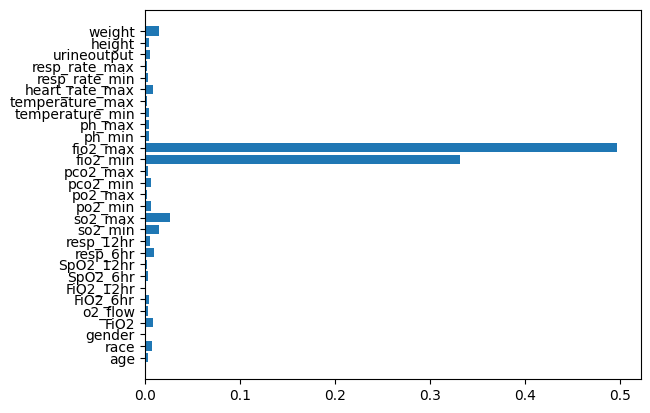

fio2_max 0.49652877
fio2_min 0.3318743
so2_max 0.026650801
so2_min 0.015626749
weight 0.01553621
resp_6hr 0.009437816
FiO2 0.009071678
heart_rate_max 0.008982571
race 0.00826481
pco2_min 0.006489087
po2_min 0.0063521927
urineoutput 0.0056218943
resp_12hr 0.005400469
ph_min 0.0050743776
ph_max 0.0049951817
temperature_min 0.00481263
FiO2_6hr 0.004504259
height 0.0041925055
resp_rate_min 0.0038246713
pco2_max 0.0037540372
SpO2_6hr 0.0037017278
age 0.0036697679
o2_flow 0.0036384084
SpO2_12hr 0.0027919163
resp_rate_max 0.0027593863
po2_max 0.0027321288
temperature_max 0.0020027542
FiO2_12hr 0.001583511
gender 0.00012541347


In [14]:
sfk = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

pred = []
truth = []
importance = []
test_index = []
for train, test in sfk.split(data_features, label):
    clf = XGBClassifier(learning_rate=0.1, colsample_bytree=0.9, n_estimators=300, max_depth=9, random_state=42)

    x_train, x_test = data_features.iloc[train], data_features.iloc[test]
    y_train, y_test = label.iloc[train], label.iloc[test]
    test_index.append(test)
    ######################## Preprocessing Pipe ########################
    ## Oversampling
    sm = SMOTEENN(random_state=42)
    X_train_scaled, y_train = sm.fit_resample(x_train, y_train)
    #######################################################################

    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(x_test)
    idx = clf.feature_importances_.argsort()[::-1]

    print('features:', data_features.columns[idx])
    if len(importance) == 0:
      importance = clf.feature_importances_
    else:
      importance = np.vstack((importance, clf.feature_importances_))
    pred.append(y_pred)
    truth.append(y_test)

pred = np.hstack(np.array(pred))
truth = np.hstack(np.array(truth))
print(classification_report(truth, pred))
print('Accuracy:',accuracy_score(truth, pred))
fpr, tpr, thresholds = roc_curve(truth, pred, pos_label=1)
print('AUC:',auc(fpr, tpr))
cm = confusion_matrix(truth, pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cmn, range(2), range(2))
print(cm)
plt.barh(data_features.columns, np.mean(importance, axis = 0))
plt.show()
idx = np.mean(importance, axis = 0).argsort()[::-1]
imp_fea = data_features.columns[idx]
imp_val = np.mean(importance, axis = 0)[idx]
for i in range(len(imp_fea)):
  print(imp_fea[i], imp_val[i])

# Drop Hemoglobin in (FiO2 with value) 

In [15]:
data_ori = pd.read_csv('HFNC_latest.csv')
data_ori = data_ori.dropna(subset=['FiO2'])
data_features = data[data['stay_id'].isin(data_ori['stay_id'].values)]
label = data_features['label']
data_features = data_features.drop(columns = ['stay_id', 'label', 'ROX_12hr', 'ROX_6hr', 'hemoglobin_max', 'hemoglobin_min'])
data_ori

,stay_id,age,race,gender,FiO2,o2_flow,FiO2_6hr,FiO2_12hr,SpO2_6hr,SpO2_12hr,...,hemoglobin_min,hemoglobin_max,temperature_min,temperature_max,heart_rate_max,resp_rate_min,resp_rate_max,urineoutput,height,weight
2,38975964,26,OTHER,M,60,4.0,NaN,NaN,92.0,94.0,...,NaN,NaN,37.06,37.56,145.0,13.0,49.0,125.0,150.0,NaN
9,32703143,47,WHITE,F,40,40.0,NaN,NaN,87.0,97.0,...,NaN,NaN,37.06,37.44,123.0,10.0,22.0,200.0,NaN,NaN
13,35530139,58,BLACK,F,50,15.0,NaN,NaN,89.0,95.0,...,NaN,NaN,36.67,37.39,118.0,15.0,33.0,300.0,NaN,NaN
14,33499069,54,WHITE,F,65,4.0,NaN,NaN,94.0,95.0,...,NaN,NaN,36.61,38.00,119.0,12.0,34.5,30.0,160.0,77.6
19,32518040,59,OTHER,F,66,15.0,NaN,NaN,96.0,95.0,...,NaN,NaN,36.44,36.83,105.0,13.0,21.0,105.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,36282126,79,WHITE,F,40,10.0,NaN,NaN,97.0,100.0,...,NaN,NaN,36.39,37.28,112.0,13.0,29.0,50.0,160.0,73.8
1398,34835242,84,WHITE,M,80,NaN,NaN,NaN,99.0,100.0,...,NaN,NaN,36.61,37.06,109.0,20.0,38.0,100.0,NaN,82.2
1400,33445075,85,WHITE,F,100,5.0,NaN,NaN,89.0,88.0,...,NaN,NaN,36.50,37.22,64.0,10.0,32.0,15.0,170.0,78.1
1401,31428455,87,WHITE,M,49,2.0,NaN,NaN,96.0,98.0,...,NaN,NaN,36.44,36.94,62.0,14.0,23.0,20.0,183.0,84.2


features: Index(['fio2_max', 'fio2_min', 'so2_min', 'so2_max', 'height', 'race',
       'urineoutput', 'pco2_min', 'po2_max', 'pco2_max', 'resp_6hr', 'po2_min',
       'weight', 'age', 'temperature_max', 'resp_12hr', 'ph_max',
       'heart_rate_max', 'resp_rate_min', 'FiO2_12hr', 'FiO2_6hr', 'ph_min',
       'temperature_min', 'SpO2_12hr', 'SpO2_6hr', 'o2_flow', 'FiO2', 'gender',
       'resp_rate_max'],
      dtype='object')
features: Index(['so2_min', 'so2_max', 'fio2_max', 'fio2_min', 'SpO2_6hr', 'FiO2',
       'po2_min', 'ph_min', 'FiO2_6hr', 'pco2_min', 'race', 'weight', 'ph_max',
       'heart_rate_max', 'o2_flow', 'pco2_max', 'age', 'height', 'SpO2_12hr',
       'resp_12hr', 'resp_rate_min', 'temperature_max', 'urineoutput',
       'po2_max', 'gender', 'resp_6hr', 'resp_rate_max', 'temperature_min',
       'FiO2_12hr'],
      dtype='object')
features: Index(['fio2_max', 'so2_max', 'fio2_min', 'so2_min', 'pco2_min',
       'heart_rate_max', 'weight', 'race', 'po2_min', 'ph_min',

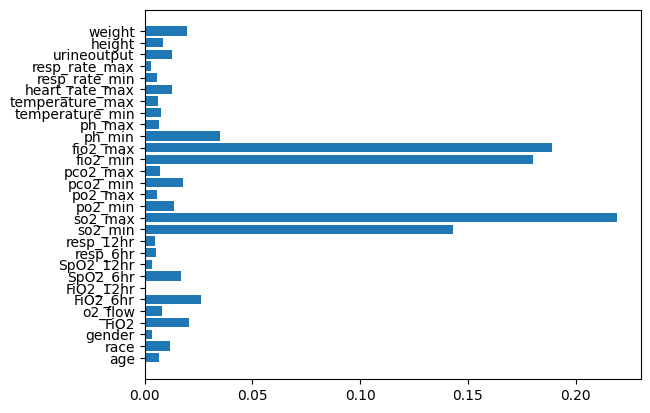

so2_max 0.21913786
fio2_max 0.18908891
fio2_min 0.18033426
so2_min 0.14310214
ph_min 0.034985673
FiO2_6hr 0.026276713
FiO2 0.02057308
weight 0.019665439
pco2_min 0.01790432
SpO2_6hr 0.016883349
po2_min 0.013496119
heart_rate_max 0.012921149
urineoutput 0.012591502
race 0.011773177
height 0.008479072
o2_flow 0.008035597
temperature_min 0.0073971213
pco2_max 0.007307018
ph_max 0.0066508204
age 0.006556005
temperature_max 0.0061210385
po2_max 0.005863267
resp_rate_min 0.0056078704
resp_6hr 0.005094315
resp_12hr 0.004778421
gender 0.0032768636
SpO2_12hr 0.0032188185
resp_rate_max 0.0027830407
FiO2_12hr 9.708372e-05


In [16]:
sfk = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

pred = []
truth = []
importance = []
test_index = []
for train, test in sfk.split(data_features, label):
    clf = XGBClassifier(learning_rate=0.1, colsample_bytree=0.9, n_estimators=300, max_depth=9, random_state=42)

    x_train, x_test = data_features.iloc[train], data_features.iloc[test]
    y_train, y_test = label.iloc[train], label.iloc[test]
    test_index.append(test)
    ######################## Preprocessing Pipe ########################
    ## Oversampling
    sm = SMOTEENN(random_state=42)
    X_train_scaled, y_train = sm.fit_resample(x_train, y_train)
    #######################################################################

    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(x_test)
    idx = clf.feature_importances_.argsort()[::-1]

    print('features:', data_features.columns[idx])
    if len(importance) == 0:
      importance = clf.feature_importances_
    else:
      importance = np.vstack((importance, clf.feature_importances_))
    pred.append(y_pred)
    truth.append(y_test)

pred = np.hstack(np.array(pred))
truth = np.hstack(np.array(truth))
print(classification_report(truth, pred))
print('Accuracy:',accuracy_score(truth, pred))
fpr, tpr, thresholds = roc_curve(truth, pred, pos_label=1)
print('AUC:',auc(fpr, tpr))
cm = confusion_matrix(truth, pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cmn, range(2), range(2))
print(cm)
plt.barh(data_features.columns, np.mean(importance, axis = 0))
plt.show()
idx = np.mean(importance, axis = 0).argsort()[::-1]
imp_fea = data_features.columns[idx]
imp_val = np.mean(importance, axis = 0)[idx]
for i in range(len(imp_fea)):
  print(imp_fea[i], imp_val[i])


# ROX index 

In [17]:
data_ori = pd.read_csv('HFNC_latest.csv')
data_ROX = data_ori.copy()
data_ROX.columns

Index(['stay_id', 'age', 'race', 'gender', 'FiO2', 'o2_flow', 'FiO2_6hr',
       'FiO2_12hr', 'SpO2_6hr', 'SpO2_12hr', 'resp_6hr', 'resp_12hr', 'label',
       'so2_min', 'so2_max', 'po2_min', 'po2_max', 'pco2_min', 'pco2_max',
       'fio2_min', 'fio2_max', 'ph_min', 'ph_max', 'hemoglobin_min',
       'hemoglobin_max', 'temperature_min', 'temperature_max',
       'heart_rate_max', 'resp_rate_min', 'resp_rate_max', 'urineoutput',
       'height', 'weight'],
      dtype='object')

In [18]:
Rox_index_6 = []
Rox_index_12 = []
Rox_pred = []
gt = []
for index, row in data_ROX.iterrows():
  if pd.isnull(row['label']):
    gt.append(0)
  else:
    gt.append(1)

  if not pd.isnull(row['SpO2_6hr']) and pd.isnull(row['SpO2_12hr']):
    if not pd.isnull(row['FiO2_6hr']) and not pd.isnull(row['FiO2_12hr']):
      if not pd.isnul(row['resp_6hr']) and not pd.isnull(row['resp_12hr']):
        cur_rox = 1 if ((row['SpO2_6hr']/row['FiO2_6hr'])/row['resp_6hr']) < 0.0385 or ((row['SpO2_12hr']/row['FiO2_12hr'])/row['resp_12hr']) < 0.0385 else 0
        Rox_pred.append(cur_rox)
      elif not pd.isnull(row['resp_6hr']):
        cur_rox = 1 if ((row['SpO2_6hr']/row['FiO2_6hr'])/row['resp_6hr']) < 0.0385 else 0
        Rox_pred.append(cur_rox)
      elif not pd.isnull(row['resp_12hr']):
        cur_rox = 1 if ((row['SpO2_12hr']/row['FiO2_12hr'])/row['resp_12hr']) < 0.0385 else 0
        Rox_pred.append(cur_rox)
      else:
        Rox_pred.append(np.nan)

    elif not pd.isnull(row['FiO2_6hr']):
      if not pd.isnull(row['resp_6hr']):
        cur_rox = 1 if ((row['SpO2_6hr']/row['FiO2_6hr'])/row['resp_6hr']) < 0.0385 else 0
        Rox_pred.append(cur_rox)
      else:
        Rox_pred.append(np.nan)

    elif not pd.isnull(row['FiO2_12hr']):
      if not pd.isnull(row['resp_12hr']):
        cur_rox = 1 if ((row['SpO2_12hr']/row['FiO2_12hr'])/row['resp_12hr']) < 0.0385 else 0
        Rox_pred.append(cur_rox)
      else:
        Rox_pred.append(np.nan)

    elif not pd.isnull(row['FiO2']):
      if not pd.isnull(row['resp_6hr']) and not pd.isnull(row['resp_12hr']):
        cur_rox = 1 if ((row['SpO2_6hr']/row['FiO2'])/row['resp_6hr']) < 0.0385 or ((row['SpO2_12hr']/row['FiO2'])/row['resp_12hr']) < 0.0385 else 0
        Rox_pred.append(cur_rox)
      elif not pd.isnull(row['resp_6hr']):
        cur_rox = 1 if ((float(row['SpO2_6hr'])/float(row['FiO2']))/float(row['resp_6hr'])) < 0.0385 else 0
        Rox_pred.append(cur_rox)
      elif not pd.isnull(row['resp_12hr']):
        cur_rox = 1 if ((row['SpO2_12hr']/row['FiO2'])/row['resp_12hr']) < 0.0385 else 0
        Rox_pred.append(cur_rox)
      else:
        Rox_pred.append(np.nan)
    else:
      Rox_pred.append(np.nan)

  elif not pd.isnull(row['SpO2_6hr']):
    if not pd.isnull(row['FiO2_6hr']) and row['FiO2_6hr'] != '-':
      if not pd.isnull(row['resp_6hr']):
        cur_rox = 1 if ((float(row['SpO2_6hr'])/float(row['FiO2_6hr']))/row['resp_6hr']) < 0.0385 else 0
        Rox_pred.append(cur_rox)
      else:
        Rox_pred.append(np.nan)
    elif not pd.isnull(row['FiO2']):
      if not pd.isnull(row['resp_6hr']):
        try:
          cur_rox = 1 if ((float(row['SpO2_6hr'])/float(row['FiO2']))/float(row['resp_6hr'])) < 0.0385 else 0
          Rox_pred.append(cur_rox)
        except:
          if not pd.isnull(row['SpO2_12hr']) and row['SpO2_12hr'] != '-':
            if not pd.isnull(row['FiO2_12hr']) and row['FiO2_12hr'] != '-':
              if not pd.isnull(row['resp_12hr']) and row['resp_12hr'] != '-':
                cur_rox = 1 if ((row['SpO2_12hr']/row['FiO2_12hr'])/row['resp_12hr']) < 0.0385 else 0
                Rox_pred.append(cur_rox)
              else:
                Rox_pred.append(np.nan)
            elif not pd.isnull(row['FiO2']) and row['FiO2'] != '-' and float(row['FiO2']) != 0:
              if not pd.isnull(row['resp_12hr']) and float(row['resp_12hr']) != 0:
                cur_rox = 1 if ((float(row['SpO2_12hr'])/float(row['FiO2']))/float(row['resp_12hr'])) < 0.0385 else 0
                Rox_pred.append(cur_rox)
              else:
                Rox_pred.append(np.nan)
            else:
              Rox_pred.append(np.nan)

          elif not pd.isnull(row['so2_max']):
            if not pd.isnull(row['FiO2_12hr']):
              if not pd.isnull(row['resp_12hr']):
                cur_rox = 1 if ((row['so2_max']/row['FiO2_12hr'])/row['resp_12hr']) < 0.0385 else 0
                Rox_pred.append(cur_rox)
              else:
                Rox_pred.append(np.nan)
            elif not pd.isnull(row['FiO2']):
              if not pd.isnull(row['resp_12hr']):
                cur_rox = 1 if ((row['so2_max']/row['FiO2'])/row['resp_12hr']) < 0.0385 else 0
                Rox_pred.append(cur_rox)
              else:
                Rox_pred.append(np.nan)
            else:
              Rox_pred.append(np.nan)
          else:
            Rox_pred.append(np.nan)


      else:
        Rox_pred.append(np.nan)
    else:
      Rox_pred.append(np.nan)

  elif not pd.isnull(row['SpO2_12hr']):
    if not pd.isnull(row['FiO2_12hr']):
      if not pd.isnull(row['resp_12hr']):
        cur_rox = 1 if ((row['SpO2_12hr']/row['FiO2_12hr'])/row['resp_12hr']) < 0.0385 else 0
        Rox_pred.append(cur_rox)
      else:
        Rox_pred.append(np.nan)
    elif not pd.isnull(row['FiO2']):
      if not pd.isnull(row['resp_12hr']):
        cur_rox = 1 if ((row['SpO2_12hr']/row['FiO2'])/row['resp_12hr']) < 0.0385 else 0
        Rox_pred.append(cur_rox)
      else:
        Rox_pred.append(np.nan)
    else:
      Rox_pred.append(np.nan)

  elif not pd.isnull(row['so2_max']):
    if not pd.isnull(row['FiO2_12hr']):
      if not pd.isnull(row['resp_12hr']):
        cur_rox = 1 if ((row['so2_max']/row['FiO2_12hr'])/row['resp_12hr']) < 0.0385 else 0
        Rox_pred.append(cur_rox)
      else:
        Rox_pred.append(np.nan)
    elif not pd.isnull(row['FiO2']):
      if not pd.isnull(row['resp_12hr']):
        cur_rox = 1 if ((row['so2_max']/row['FiO2'])/row['resp_12hr']) < 0.0385 else 0
        Rox_pred.append(cur_rox)
      else:
        Rox_pred.append(np.nan)
    else:
      Rox_pred.append(np.nan)
  else:
    Rox_pred.append(np.nan)



data_ROX['rox_pred'] = Rox_pred
data_ROX['gt'] = gt
data_ROX = data_ROX.dropna(subset=['rox_pred'])
data_features = data[data['stay_id'].isin(data_ROX['stay_id'].values)]
label = data_features['label']
data_features = data_features.drop(columns = ['stay_id', 'label', 'ROX_12hr', 'ROX_6hr'])
print('######################### ROX #########################')
print(classification_report(data_ROX['gt'], data_ROX['rox_pred']))
print('Accuracy:',accuracy_score(data_ROX['gt'], data_ROX['rox_pred']))
fpr, tpr, thresholds = roc_curve(data_ROX['gt'], data_ROX['rox_pred'], pos_label=1)
print('AUC:',auc(fpr, tpr))
cm = confusion_matrix(data_ROX['gt'], data_ROX['rox_pred'])
print(cm)


######################### ROX #########################
              precision    recall  f1-score   support

           0       0.73      0.91      0.81       476
           1       0.32      0.10      0.16       183

    accuracy                           0.69       659
   macro avg       0.52      0.51      0.48       659
weighted avg       0.61      0.69      0.63       659

Accuracy: 0.6889226100151745
AUC: 0.5088453414152545
[[435  41]
 [164  19]]


features: Index(['hemoglobin_min', 'hemoglobin_max', 'fio2_max', 'so2_min', 'pco2_min',
       'so2_max', 'fio2_min', 'SpO2_12hr', 'pco2_max', 'height', 'po2_min',
       'urineoutput', 'FiO2_6hr', 'po2_max', 'weight', 'ph_max',
       'heart_rate_max', 'resp_rate_max', 'o2_flow', 'resp_6hr', 'ph_min',
       'temperature_min', 'temperature_max', 'resp_12hr', 'resp_rate_min',
       'SpO2_6hr', 'FiO2_12hr', 'FiO2', 'gender', 'race', 'age'],
      dtype='object')
features: Index(['hemoglobin_min', 'hemoglobin_max', 'pco2_min', 'fio2_min', 'so2_min',
       'fio2_max', 'so2_max', 'weight', 'resp_6hr', 'urineoutput', 'resp_12hr',
       'race', 'gender', 'FiO2', 'o2_flow', 'FiO2_6hr', 'FiO2_12hr',
       'SpO2_6hr', 'SpO2_12hr', 'temperature_min', 'temperature_max',
       'resp_rate_max', 'po2_min', 'po2_max', 'height', 'pco2_max',
       'resp_rate_min', 'heart_rate_max', 'ph_min', 'ph_max', 'age'],
      dtype='object')
features: Index(['hemoglobin_min', 'hemoglobin_max', 'so2_min', 's

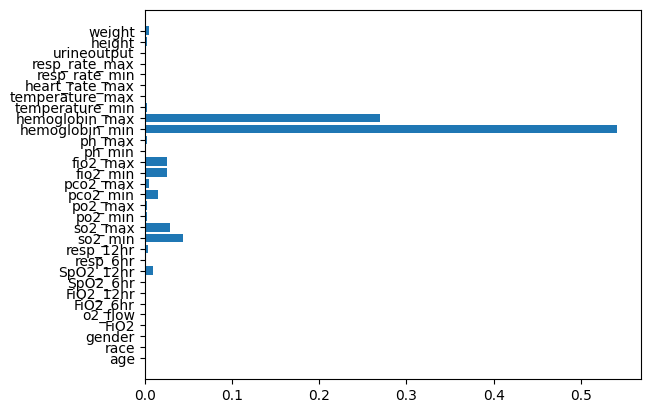

features: Index(['hemoglobin_min', 'hemoglobin_max', 'so2_min', 'so2_max', 'fio2_min',
       'fio2_max', 'pco2_min', 'SpO2_12hr', 'weight', 'pco2_max', 'resp_12hr',
       'height', 'po2_min', 'po2_max', 'temperature_min', 'ph_max',
       'resp_rate_max', 'resp_rate_min', 'heart_rate_max', 'FiO2_6hr',
       'resp_6hr', 'o2_flow', 'urineoutput', 'age', 'SpO2_6hr', 'ph_min',
       'temperature_max', 'race', 'FiO2_12hr', 'FiO2', 'gender'],
      dtype='object')
hemoglobin_min 0.54141855
hemoglobin_max 0.27005106
so2_min 0.044357456
so2_max 0.028910298
fio2_min 0.02578563
fio2_max 0.025556475
pco2_min 0.015926259
SpO2_12hr 0.009431772
weight 0.0050290423
pco2_max 0.004622873
resp_12hr 0.0037710965
height 0.0029641036
po2_min 0.0028786552
po2_max 0.002584104
temperature_min 0.0022494837
ph_max 0.0022465538
resp_rate_max 0.001990426
resp_rate_min 0.001317262
heart_rate_max 0.0012705231
FiO2_6hr 0.001182786
resp_6hr 0.0011356724
o2_flow 0.0010754664
urineoutput 0.0009899206
age 0.00092315

In [19]:
data_features = data[data['stay_id'].isin(data_ROX['stay_id'].values)]
label = data_features['label']
data_features = data_features.drop(columns = ['stay_id', 'label', 'ROX_12hr', 'ROX_6hr'])
sfk = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

pred = []
truth = []
importance = []
test_index = []
for train, test in sfk.split(data_features, label):
    clf = XGBClassifier(learning_rate=0.1, colsample_bytree=0.9, n_estimators=300, max_depth=9, random_state=42)

    x_train, x_test = data_features.iloc[train], data_features.iloc[test]
    y_train, y_test = label.iloc[train], label.iloc[test]
    test_index.append(test)
    ######################## Preprocessing Pipe ########################
    ## Oversampling
    sm = SMOTEENN(random_state=42)
    X_train_scaled, y_train = sm.fit_resample(x_train, y_train)
    #######################################################################

    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(x_test)
    idx = clf.feature_importances_.argsort()[::-1]

    print('features:', data_features.columns[idx])
    if len(importance) == 0:
      importance = clf.feature_importances_
    else:
      importance = np.vstack((importance, clf.feature_importances_))
    pred.append(y_pred)
    truth.append(y_test)

pred = np.hstack(np.array(pred))
truth = np.hstack(np.array(truth))
print(classification_report(truth, pred))
print('Accuracy:',accuracy_score(truth, pred))
fpr, tpr, thresholds = roc_curve(truth, pred, pos_label=1)
print('AUC:',auc(fpr, tpr))
cm = confusion_matrix(truth, pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cmn, range(2), range(2))
print(cm)
plt.barh(data_features.columns, np.mean(importance, axis = 0))
plt.show()
idx = np.mean(importance, axis = 0).argsort()[::-1]
print('features:', data_features.columns[idx])

imp_fea = data_features.columns[idx]
imp_val = np.mean(importance, axis = 0)[idx]
for i in range(len(imp_fea)):
  print(imp_fea[i], imp_val[i])


# ROX index + Drop hemoglobin

In [20]:
label = data['label']
data_features = data.drop(columns = ['stay_id', 'label', 'ROX_12hr', 'ROX_6hr', 'hemoglobin_max', 'hemoglobin_min'])

features: Index(['fio2_max', 'fio2_min', 'so2_max', 'so2_min', 'temperature_min',
       'po2_min', 'o2_flow', 'weight', 'age', 'race', 'heart_rate_max',
       'resp_12hr', 'ph_max', 'po2_max', 'FiO2_12hr', 'FiO2', 'pco2_max',
       'resp_6hr', 'temperature_max', 'SpO2_6hr', 'FiO2_6hr', 'pco2_min',
       'height', 'resp_rate_max', 'urineoutput', 'ph_min', 'SpO2_12hr',
       'gender', 'resp_rate_min'],
      dtype='object')
features: Index(['fio2_max', 'fio2_min', 'so2_max', 'resp_6hr', 'so2_min', 'po2_min',
       'heart_rate_max', 'ph_min', 'weight', 'o2_flow', 'height',
       'resp_rate_max', 'ph_max', 'pco2_min', 'pco2_max', 'FiO2', 'po2_max',
       'temperature_min', 'race', 'age', 'resp_12hr', 'SpO2_6hr',
       'urineoutput', 'resp_rate_min', 'temperature_max', 'FiO2_6hr',
       'FiO2_12hr', 'SpO2_12hr', 'gender'],
      dtype='object')
features: Index(['fio2_max', 'fio2_min', 'so2_max', 'weight', 'FiO2', 'FiO2_6hr',
       'pco2_min', 'so2_min', 'urineoutput', 'race', 'ph

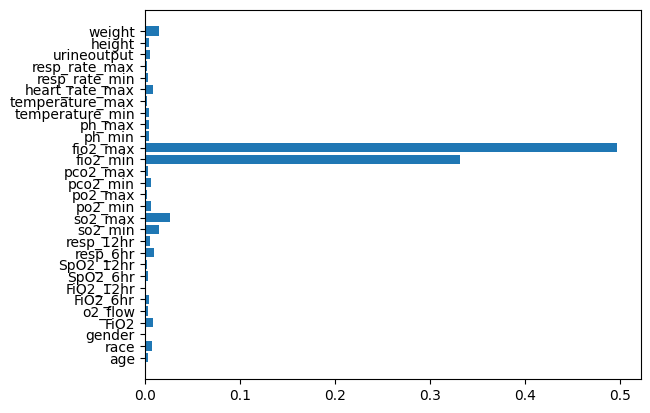

fio2_max 0.49652877
fio2_min 0.3318743
so2_max 0.026650801
so2_min 0.015626749
weight 0.01553621
resp_6hr 0.009437816
FiO2 0.009071678
heart_rate_max 0.008982571
race 0.00826481
pco2_min 0.006489087
po2_min 0.0063521927
urineoutput 0.0056218943
resp_12hr 0.005400469
ph_min 0.0050743776
ph_max 0.0049951817
temperature_min 0.00481263
FiO2_6hr 0.004504259
height 0.0041925055
resp_rate_min 0.0038246713
pco2_max 0.0037540372
SpO2_6hr 0.0037017278
age 0.0036697679
o2_flow 0.0036384084
SpO2_12hr 0.0027919163
resp_rate_max 0.0027593863
po2_max 0.0027321288
temperature_max 0.0020027542
FiO2_12hr 0.001583511
gender 0.00012541347


In [21]:
sfk = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

pred = []
truth = []
importance = []
test_index = []
for train, test in sfk.split(data_features, label):
    clf = XGBClassifier(learning_rate=0.1, colsample_bytree=0.9, n_estimators=300, max_depth=9, random_state=42)

    x_train, x_test = data_features.iloc[train], data_features.iloc[test]
    y_train, y_test = label.iloc[train], label.iloc[test]
    test_index.append(test)
    ######################## Preprocessing Pipe ########################
    ## Oversampling
    sm = SMOTEENN(random_state=42)
    X_train_scaled, y_train = sm.fit_resample(x_train, y_train)
    #######################################################################

    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(x_test)
    idx = clf.feature_importances_.argsort()[::-1]

    print('features:', data_features.columns[idx])
    if len(importance) == 0:
      importance = clf.feature_importances_
    else:
      importance = np.vstack((importance, clf.feature_importances_))
    pred.append(y_pred)
    truth.append(y_test)

pred = np.hstack(np.array(pred))
truth = np.hstack(np.array(truth))
print(classification_report(truth, pred))
print('Accuracy:',accuracy_score(truth, pred))
fpr, tpr, thresholds = roc_curve(truth, pred, pos_label=1)
print('AUC:',auc(fpr, tpr))
cm = confusion_matrix(truth, pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cmn, range(2), range(2))
print(cm)
plt.barh(data_features.columns, np.mean(importance, axis = 0))
plt.show()
idx = np.mean(importance, axis = 0).argsort()[::-1]
imp_fea = data_features.columns[idx]
imp_val = np.mean(importance, axis = 0)[idx]
for i in range(len(imp_fea)):
  print(imp_fea[i], imp_val[i])